# Cargando las librerias requeridas

In [ ]:
import pandas as pd
import plotnine as ptn

In [2]:
from sklearn import datasets

# Cargando el dataset de vino
wine = datasets.load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [12]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X = wine.data)

# Clase DBScan

## Existen múltiples parámetros para el modelo DBScan

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

``` python
DBSCAN = DBSCAN(eps         = 0.5,
                min_samples = 5,
                metric      = 'euclidean')
```
donde:

- `eps`: radio de la esfera n-dimensional para la cual se buscan los minPoints.
- `minPts`: número mínimo de puntos dentro de la región definida por eps para considerar a un punto como crítico (el punto a analizar también se cuenta).
- `metric`: métrica para el cálculo de la distancia

Para la distancia, podemos usar:
- `scikit-learn`: cityblock, cosine, euclidean, manhattan
- `scipy.spatial.distance`: chebyshev, correlation, hamming, jaccard, mahalanobis, minkowski, seuclidean, sqeuclidean

## Existen múltiple métodos/funciones para el modelo DBScan

- Entrena el modelo con los parametros asignados.
``` python
DBSCAN.fit(X = data)
```

- Entrena y devuelve los clusters encontrados con los parametros asignados.
``` python
DBSCAN.fit_predict(X = data)
```
# Caracteristicas del modelo entrenado

Una vez entrenado el modelo, existen nuevas características que podemos observar (atributos)

## Atributos

- `core_sample_indices_`: indices de puntos core.
- `components_`: Copia de los puntos core.
- `labels_`: etiquetas de los puntos (-1 implica outlier/noise (N)).

In [9]:
# Creando un objeto de DBSCAN con las condiciones iniciales
from sklearn.cluster import DBSCAN

DBScan = DBSCAN(eps         = 2,
                min_samples = 4,
                metric      = 'euclidean')

# Entrenando el modelo
DBScan = DBScan.fit(X = scaled_features)

# Mostrando las clases aprendidas
print(DBScan.labels_) 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0  0  0  0 -1  0  0  0 -1 -1  0 -1  0  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  1  1  1  2  2 -1 -1  2  3  3 -1  3  2
 -1  1 -1  4  4  5  5  5 -1  4  2  4  4 -1 -1 -1  4  3  3  1  4  2  4  4
  4 -1  1  4  4  4  4  5 -1 -1]


In [10]:
# Mostrando los puntos CORES (observar que varios puntos no fueron considerados)
print(DBScan.core_sample_indices_) 

[  0   3   5   6   8   9  11  12  15  16  17  20  22  23  24  26  27  28
  29  31  34  35  36  37  38  40  44  47  48  49  51  52  53  54  55  56
  57  58  81  82  85  86  88  90  91  92  97 101 102 104 106 107 114 116
 125 128 131 135 138 139 140 142 147 148 149 156 161 162 163 164 167 172
 173 174]


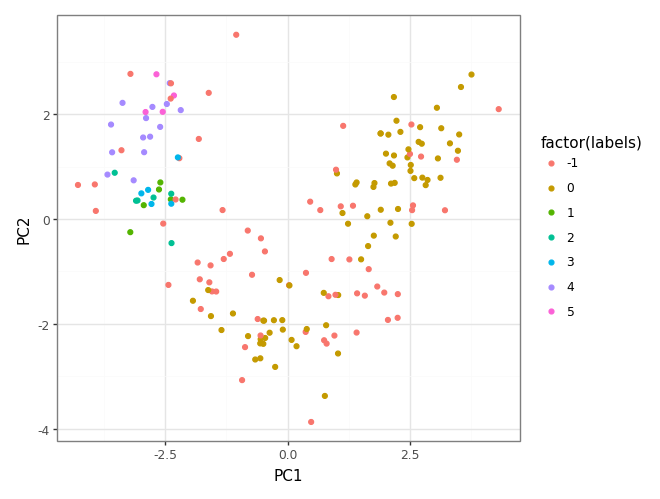

In [8]:
# Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(X = scaled_features)

pca_scaled_features_df = pca.transform(X = scaled_features)
pca_scaled_features_df = pd.DataFrame(data    = pca_scaled_features_df,
                                      columns = ["PC1", "PC2"])
pca_scaled_features_df["labels"] = DBScan.labels_

(
    ptn.ggplot(data = pca_scaled_features_df) + 
    ptn.aes(x = "PC1", y = "PC2", color = "factor(labels)") + 
    ptn.geom_point() +
    ptn.theme_bw()
)

# Clase NearestNeighbors

## Buscando eps

Para calcular las distancias de los vecinos se utiliza la clase `sklearn.neighbors.NearestNeighbors`

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

``` python
NearestNeighbors = NearestNeighbors(n_neighbors = 5,
                                    metric      = 'minkowski',
                                    p           = 2)
```
donde:

- `n_neighbors`: Números de vecinos a estimar.
- `metric`: métrica para el cálculo de la distancia.
- `p`: parámetro de la distancia de minkowski (2 es euclideana).

## Existen múltiple métodos/funciones para el modelo NearestNeighbors

- Encontrar los vecinos más cercanos de los datos.
``` python
NearestNeighbors.fit(X = data)
```

- Encontrar los K vecinos más cercano de un punto, retorna tanto los índices como la distancia.
``` python
NearestNeighbors.kneighbors(X, n_neighbors)
```

- Encontrar los vecinos de uno o más puntos que se encuentran dentro de un radio determinado.
``` python
NearestNeighbors.radius_neighbors(X, radius)
```

# Caracteristicas del modelo entrenado

Una vez ajustado el modelo, existen nuevas características que podemos observar (atributos)

## Atributos

- `effective_metric_`: métrica usada para el cálculo de la distancia.
- `effective_metric_params_`: Parámetros de la métrica usada para el cálculo de la distancia.
- `n_samples_fit_`: número de puntos del dataset.

In [18]:
from sklearn.neighbors import NearestNeighbors

numNeighboors = 5

# Creando el modelo
neighbors = NearestNeighbors(n_neighbors = numNeighboors)

# "Entrenando" el modelo
neighbors_fit = neighbors.fit(X = scaled_features)

# "Buscando los vecinos más cercanos"
distances, indices = neighbors_fit.kneighbors(X = scaled_features)
distances = distances[:, numNeighboors-1]
distances.sort()
distances

array([1.53918414, 1.56072685, 1.56952353, 1.6395218 , 1.6503667 ,
       1.67305232, 1.70848621, 1.72581699, 1.73178135, 1.73178135,
       1.73803859, 1.7537641 , 1.76694962, 1.77436384, 1.80172404,
       1.81017493, 1.81823454, 1.82091883, 1.8325489 , 1.83671402,
       1.83922576, 1.84452915, 1.84637932, 1.84940274, 1.85252735,
       1.85630815, 1.85651213, 1.85782649, 1.85800786, 1.86519441,
       1.86631564, 1.87681966, 1.8798772 , 1.89040123, 1.90452712,
       1.91493766, 1.92240081, 1.93275349, 1.94791769, 1.95680606,
       1.96452845, 1.97046624, 1.97282443, 1.97457565, 1.97563113,
       1.97592574, 2.00206292, 2.00367441, 2.01313773, 2.01449897,
       2.01650329, 2.02573984, 2.02573984, 2.02700669, 2.02806138,
       2.04641782, 2.04756787, 2.04764209, 2.0511243 , 2.05191363,
       2.05191363, 2.06051072, 2.06510362, 2.0699575 , 2.07080774,
       2.07125233, 2.07339685, 2.0763989 , 2.07794043, 2.07856161,
       2.07923173, 2.08635735, 2.0866021 , 2.08875073, 2.09363

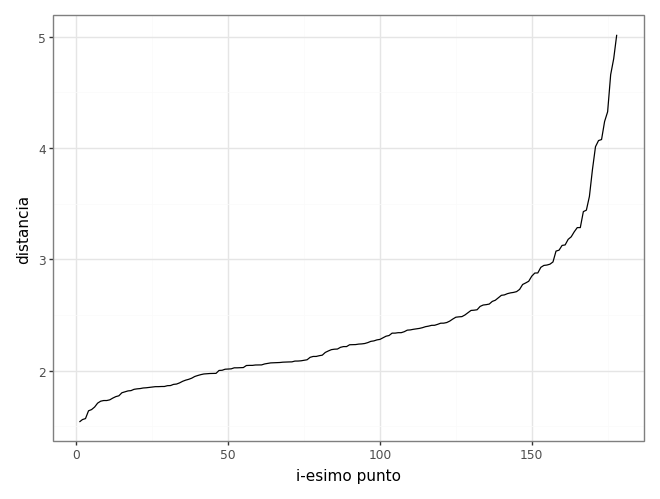

In [34]:
distances_df = pd.DataFrame(data    = range(1, len(distances) + 1),
                            columns = ["puntos"])

distances_df["dist"] = distances

(
    ptn.ggplot(data = distances_df) +
    ptn.aes(x = "puntos", y = "dist") +
    ptn.theme_bw() +
    ptn.geom_line() +
    ptn.labs(y = "distancia", x = "i-esimo punto")
)

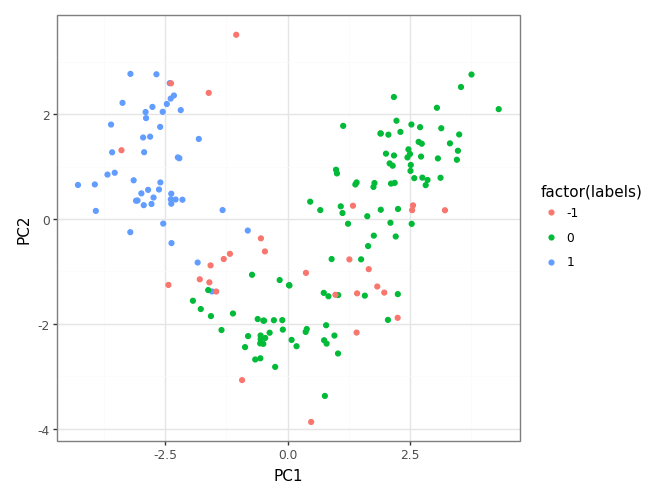

In [35]:
# Creando un objeto de DBSCAN con las condiciones iniciales
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps         = 2.4,
            min_samples = 3,
            metric      = 'euclidean')

DB = DB.fit(X = scaled_features)

pca = PCA(n_components = 2)

pca.fit(X = scaled_features)

df = pca.transform(X = scaled_features)
df = pd.DataFrame(data    = df,
                  columns = ["PC1", "PC2"])
df["labels"] = DB.labels_
(
    ptn.ggplot(data = df) +
    ptn.aes(x = "PC1", y = "PC2", color = "factor(labels)") +
    ptn.geom_point() + 
    ptn.theme_bw()
)